In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip
df = pd.read_excel('/content/AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])
df.replace(to_replace=-200.0, value=0.0, inplace=True)
wv = df['NMHC(GT)']
bad_wv = wv == -200.0
wv[bad_wv] = 0.0

--2020-10-27 17:22:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  3.77MB/s    in 0.4s    

2020-10-27 17:22:39 (3.77 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
y = 'NO2(GT)'
y

'NO2(GT)'

In [ ]:
df.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_Time      9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.5 KB


In [ ]:
df.corr()[[y]]

,NO2(GT)
CO(GT),0.723154
PT08.S1(CO),0.284508
NMHC(GT),0.099541
C6H6(GT),0.402581
PT08.S2(NMHC),0.334108
NOx(GT),0.795888
PT08.S3(NOx),-0.440202
NO2(GT),1.000000
PT08.S4(NO2),0.010185
PT08.S5(O3),0.439057


In [ ]:
df = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','PT08.S2(NMHC)', 'NOx(GT)','NO2(GT)','PT08.S5(O3)']]

In [ ]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S5(O3)
0,2.6,1360.00,150,1045.50,166.0,113.0,1267.50
1,2.0,1292.25,112,954.75,103.0,92.0,972.25
2,2.2,1402.00,88,939.25,131.0,114.0,1074.00
3,2.2,1375.50,80,948.25,172.0,122.0,1203.25
4,1.6,1272.25,51,835.50,131.0,116.0,1110.00


In [ ]:
X = df.drop(y,axis=1)
y = df[[y]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)
value = y_test

In [ ]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(7017, 6)
(2340, 6)
(7017, 1)
(2340, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
scaler.fit(x_test)
x_test = scaler.fit_transform(x_test)
scaler.fit(y_train)
y_train = scaler.fit_transform(y_train)
scaler.fit(y_test)
y_test = scaler.fit_transform(y_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print (x_train.shape)
print (x_test.shape)

(7017, 6, 1)
(2340, 6, 1)


In [ ]:
print (y_train.shape)
print (y_test.shape)

(7017, 1)
(2340, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
def RNN_MODEL():
    
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])
    return regressor

In [ ]:
regressor = RNN_MODEL()

In [ ]:
regressor.fit(x_train,y_train,epochs = 100)

Epoch 1/100
220/220 [==============================] - 3s 11ms/step - loss: 0.0255 - accuracy: 0.1733
Epoch 2/100
220/220 [==============================] - 3s 12ms/step - loss: 0.0212 - accuracy: 0.1730
Epoch 3/100
220/220 [==============================] - 3s 11ms/step - loss: 0.0190 - accuracy: 0.1730
Epoch 4/100
220/220 [==============================] - 3s 12ms/step - loss: 0.0175 - accuracy: 0.1730
Epoch 5/100
220/220 [==============================] - 3s 11ms/step - loss: 0.0163 - accuracy: 0.1734
Epoch 6/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0161 - accuracy: 0.1734
Epoch 7/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0157 - accuracy: 0.1733
Epoch 8/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0153 - accuracy: 0.1729
Epoch 9/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0149 - accuracy: 0.1729
Epoch 10/100
220/220 [==============================] - 2s 11ms/step - loss: 0.014

In [ ]:
regressor.evaluate(x_test,y_test)

74/74 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.1821


[0.005017029121518135, 0.18205128610134125]

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([[-0.00647581],
       [-0.0031257 ],
       [-0.01070303],
       ...,
       [-0.00755119],
       [ 0.27732536],
       [ 0.20909089]], dtype=float32)

In [ ]:
output = scaler.inverse_transform(y_pred)
real_output = []
for item in output:
    real_output.append((item[0]))

In [ ]:
real_output

[-2.023042,
 -0.97646785,
 -3.3436258,
 117.44091,
 91.88229,
 75.20579,
 132.66623,
 122.47055,
 117.36826,
 123.016426,
 131.89539,
 235.26875,
 140.42426,
 50.079098,
 -3.3052676,
 125.93473,
 123.476265,
 112.12146,
 189.80724,
 120.104126,
 139.7314,
 134.48853,
 -1.1895142,
 150.17717,
 53.67621,
 0.20430402,
 137.75954,
 87.23256,
 55.612106,
 -3.2217824,
 125.14685,
 -1.7431759,
 -3.4027457,
 93.1404,
 155.4398,
 101.72199,
 118.67995,
 88.94131,
 116.280785,
 117.142456,
 118.140305,
 45.081383,
 166.44138,
 124.38988,
 -3.1296763,
 93.046814,
 67.21023,
 128.40358,
 127.889626,
 74.17287,
 0.27445674,
 112.557724,
 115.15846,
 173.83646,
 98.78371,
 113.518,
 55.94344,
 148.27254,
 -3.4850204,
 71.51214,
 1.6873982,
 -2.7815568,
 181.01161,
 126.68492,
 159.42242,
 141.84282,
 92.36061,
 116.61977,
 117.789276,
 113.41281,
 183.45143,
 79.76721,
 66.38613,
 81.93759,
 162.51302,
 -2.7885954,
 66.21495,
 107.556,
 123.13023,
 117.49627,
 -0.6002036,
 143.52887,
 170.15498,
 -3

In [ ]:
value['predicted'] = np.array(real_output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (100,100)
%matplotlib inline

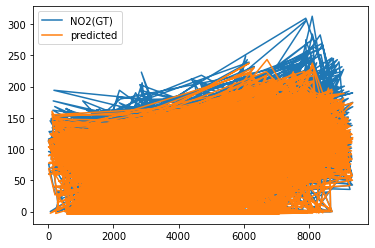

In [ ]:
value.plot()